In [1]:
import json

asinReviewDict = json.load(open('./out/asinReviewDict.json'))

In [ ]:
# f = open('../amazon_yolo_data/metadata.json', 'r')
# l = f.readlines()

In [6]:
from itertools import islice
import pickle
with open("../amazon_yolo_data/metadata.json") as myfile:
    l = list(islice(myfile, 100))
    
import simplejson
f = open('output.txt', 'w')
for l1 in l:
    f.write(l1)
f.close()

In [11]:
import ast

asinReviewSRPDTDict = {}
products_found = 0
lines_read = 0

with open('../amazon_yolo_data/metadata.json') as fp: 
    line = fp.readline()
    while line:
        lines_read += 1
        d = ast.literal_eval(line.strip())
        if d['asin'] in asinReviewDict:
            products_found += 1
            asinReviewSRPDTDict[d['asin']] =  { "Best review" : asinReviewDict[d['asin']]["Best review"] }
            if 'salesRank' in d:
                asinReviewSRPDTDict[d['asin']] ["salesRank"] = d['salesRank']
            if 'title' in d:
                asinReviewSRPDTDict[d['asin']] ["title"] =  d['title']
            if 'description' in d:
                asinReviewSRPDTDict[d['asin']] ["description"] =  d['description']
        if lines_read % 100000 == 0:
            print("lines read:",lines_read,"products found:", products_found)
        line = fp.readline()

lines read: 100000 products found: 0
lines read: 200000 products found: 0
lines read: 300000 products found: 0
lines read: 400000 products found: 0
lines read: 500000 products found: 2
lines read: 600000 products found: 2
lines read: 700000 products found: 2
lines read: 800000 products found: 2
lines read: 900000 products found: 3
lines read: 1000000 products found: 3
lines read: 1100000 products found: 3
lines read: 1200000 products found: 3
lines read: 1300000 products found: 3
lines read: 1400000 products found: 4
lines read: 1500000 products found: 4
lines read: 1600000 products found: 4
lines read: 1700000 products found: 5
lines read: 1800000 products found: 9
lines read: 1900000 products found: 11
lines read: 2000000 products found: 302
lines read: 2100000 products found: 1273
lines read: 2200000 products found: 2312
lines read: 2300000 products found: 3560
lines read: 2400000 products found: 4271
lines read: 2500000 products found: 5014
lines read: 2600000 products found: 5586


In [ ]:
import ast
# from itertools import islice
# with open("../amazon_yolo_data/metadata.json") as myfile:
#     l = list(islice(myfile, 100000))
    
asinReviewSRPDTDict = {}

for line in l:
    d = ast.literal_eval(line)
    if d['asin'] in asinReviewDict:
        asinReviewSRPDTDict[d['asin']] = {
                                            "Best review" : asinReviewDict[d['asin']]["Best review"],
                                              "salesRank": d['salesRank'],
                                              "title":  d['title'],
                                              "description" : d['description']
                                         }

In [12]:
len(asinReviewSRPDTDict)

27482

In [23]:
i = 0
asins = []
for key in asinReviewSRPDTDict:
    asins.append(key)
    i+=1
    if i > 100:
        break

In [25]:
for asin in asins:
    print(asinReviewSRPDTDict[asin])

{'title': 'Chester The Cat/Kitten Salt &amp; Pepper Shakers', 'salesRank': {'Kitchen & Dining': 87043}, 'Best review': "These Chester Cats are exactly as pictured & make me smile every time I look at them.  I'm not using them for salt & pepper: they're in my curio cabinet being their sweet kitty selves as collectables.  All cat lovers would love these.", 'description': 'Adorable set of salt and pepper shakers'}
{'title': 'George Foreman GV5 Roaster and Contact Cooker', 'salesRank': {'Kitchen & Dining': 145426}, 'Best review': "This works pretty good when you're in a hurry to make a quick chicken dinner. Would be nice if it was a little bigger. Overall,I would buy it because I hate tying up chickens with string! With this little gadget, you just wash, season and toss the chicken in. The only down side is the clean up. If you don't clean it right away, the juice and stuck on pieces get to be very difficult to remove. (They literally have to be soaked with wet paper towels.)", 'descriptio

In [13]:
with open('./out/asinReviewSRPDTDict.json', 'w') as outfile:
    json.dump(asinReviewSRPDTDict, outfile)

In [26]:
cleanCompleteSmallData = {}
for asin in asinReviewSRPDTDict:
    d = asinReviewSRPDTDict[asin]
    if ('salesRank' in d) and ('title' in d) and ('description' in d):
        cleanCompleteSmallData [asin] = d

In [27]:
len(cleanCompleteSmallData)

26087

In [43]:
departments = []
noSalesRank = []
for asin in cleanCompleteSmallData:
    if len([*cleanCompleteSmallData[asin]['salesRank'].keys()]) > 0:
        departments.append([*cleanCompleteSmallData[asin]['salesRank'].keys()][0])
    else:
        noSalesRank.append(asin)
len(noSalesRank)

In [47]:
# remove entries for which salesrank is empty
for asin in noSalesRank:
    del cleanCompleteSmallData[asin]

In [49]:
len(cleanCompleteSmallData)

26065

In [50]:
with open('./out/cleanCompleteSmallDataDict.json', 'w') as outfile:
    json.dump(cleanCompleteSmallData, outfile)

In [54]:
deptFreqDict = {}
for dept in departments:
    if dept in deptFreqDict:
        deptFreqDict[dept] = deptFreqDict[dept] + 1
    else:
        deptFreqDict[dept] = 1
deptFreqDict

{'Appliances': 9,
 'Arts, Crafts & Sewing': 46,
 'Automotive': 4,
 'Baby': 7,
 'Beauty': 29,
 'Camera &amp; Photo': 2,
 'Cell Phones & Accessories': 1,
 'Computers & Accessories': 1,
 'Electronics': 36,
 'Grocery & Gourmet Food': 6,
 'Health & Personal Care': 279,
 'Home &amp; Kitchen': 8650,
 'Home Improvement': 61,
 'Industrial & Scientific': 147,
 'Kitchen & Dining': 16427,
 'Office Products': 9,
 'Patio, Lawn & Garden': 141,
 'Pet Supplies': 23,
 'Sports &amp; Outdoors': 129,
 'Toys & Games': 58}

In [61]:
deptFreqDict['Home &amp; Kitchen'] + deptFreqDict['Kitchen & Dining']

25077

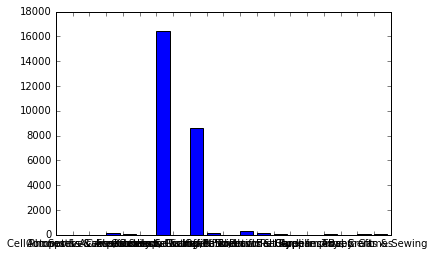

In [60]:
% matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(len(deptFreqDict)), list(deptFreqDict.values()))
plt.xticks(range(len(deptFreqDict)), list(deptFreqDict.keys()))

plt.show()

In [63]:
HomeKitchenCleanData = {}
KitchenDiningCleanData = {}

for asin in cleanCompleteSmallData:
    if [*cleanCompleteSmallData[asin]['salesRank'].keys()][0] == 'Home &amp; Kitchen':
        HomeKitchenCleanData[asin] = cleanCompleteSmallData[asin]
    elif [*cleanCompleteSmallData[asin]['salesRank'].keys()][0] == 'Kitchen & Dining':
        KitchenDiningCleanData[asin] = cleanCompleteSmallData[asin]
        
print(len(HomeKitchenCleanData), len(KitchenDiningCleanData))

with open('./out/HomeKitchenCleanDataDict.json', 'w') as outfile:
    json.dump(HomeKitchenCleanData, outfile)

with open('./out/KitchenDiningCleanDataDict.json', 'w') as outfile:
    json.dump(KitchenDiningCleanData, outfile)

8650 16427


In [4]:
import json
json_data=open('./out/HomeKitchenCleanDataDict.json').read()
HomeKitchenCleanData = json.loads(json_data)

In [5]:
# Further analysis on HomeKitchenCleanData for now
# lets get the lengths of all description and reviews in this data
allReviewLengthFrequenciesDict = {}
allDescriptionLengthFrequenciesDict = {}

for asin in HomeKitchenCleanData:
    reviewLength = len(HomeKitchenCleanData[asin]["Best review"])
    descriptionLength = len(HomeKitchenCleanData[asin]["description"])
    
    if reviewLength in allReviewLengthFrequenciesDict:
        allReviewLengthFrequenciesDict[reviewLength] = allReviewLengthFrequenciesDict[reviewLength] + 1
    else:
        allReviewLengthFrequenciesDict[reviewLength] = 1
        
    if descriptionLength in allDescriptionLengthFrequenciesDict:
        allDescriptionLengthFrequenciesDict[descriptionLength] = allDescriptionLengthFrequenciesDict[descriptionLength] + 1
    else:
        allDescriptionLengthFrequenciesDict[descriptionLength] = 1

print(len(allDescriptionLengthFrequenciesDict),len(allReviewLengthFrequenciesDict))

1582 1796


In [6]:
minDescLength = min([*allDescriptionLengthFrequenciesDict.keys()])
maxDescLength = max([*allDescriptionLengthFrequenciesDict.keys()])

minRevLength = min([*allReviewLengthFrequenciesDict.keys()])
maxRevLength = max([*allReviewLengthFrequenciesDict.keys()])

print(minDescLength,allDescriptionLengthFrequenciesDict[minDescLength],maxDescLength,allDescriptionLengthFrequenciesDict[maxDescLength])
print(minRevLength,allReviewLengthFrequenciesDict[minRevLength],maxRevLength,allReviewLengthFrequenciesDict[maxRevLength])

0 756 18079 1
0 4 13177 1


In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
from plotly.graph_objs import Figure, Layout, Scatter, Bar
import plotly.figure_factory as ff
init_notebook_mode(connected=True)

In [9]:
revLengths = []
revLengthFreqs = []
for i in range(maxRevLength):
    revLengths.append(i)
    if i in allReviewLengthFrequenciesDict:
        revLengthFreqs.append(allReviewLengthFrequenciesDict[i])
    else:
        revLengthFreqs.append(0)

data = [
        Bar(
            x=revLengths,
            y=revLengthFreqs
        )
]

iplot(data)

In [11]:
descLengths = []
descLengthFreqs = []
for i in range(maxDescLength):
    descLengths.append(i)
    if i in allDescriptionLengthFrequenciesDict and i != 0:
        descLengthFreqs.append(allDescriptionLengthFrequenciesDict[i])
    else:
        descLengthFreqs.append(0)

data = [
        Bar(
            x=descLengths,
            y=descLengthFreqs
        )
]

iplot(data)

In [11]:
sampleAsins = [*HomeKitchenCleanData.keys()][:100]

In [13]:
for asin in sampleAsins:
    print(HomeKitchenCleanData[asin]["salesRank"])

{'Home &amp; Kitchen': 1010665}
{'Home &amp; Kitchen': 9854}
{'Home &amp; Kitchen': 5967}
{'Home &amp; Kitchen': 222763}
{'Home &amp; Kitchen': 116929}
{'Home &amp; Kitchen': 163927}
{'Home &amp; Kitchen': 45478}
{'Home &amp; Kitchen': 30747}
{'Home &amp; Kitchen': 15122}
{'Home &amp; Kitchen': 347078}
{'Home &amp; Kitchen': 45440}
{'Home &amp; Kitchen': 35652}
{'Home &amp; Kitchen': 81822}
{'Home &amp; Kitchen': 2148}
{'Home &amp; Kitchen': 23637}
{'Home &amp; Kitchen': 183587}
{'Home &amp; Kitchen': 12472}
{'Home &amp; Kitchen': 1322}
{'Home &amp; Kitchen': 45504}
{'Home &amp; Kitchen': 24894}
{'Home &amp; Kitchen': 404206}
{'Home &amp; Kitchen': 124887}
{'Home &amp; Kitchen': 56536}
{'Home &amp; Kitchen': 375415}
{'Home &amp; Kitchen': 156614}
{'Home &amp; Kitchen': 3313}
{'Home &amp; Kitchen': 104117}
{'Home &amp; Kitchen': 293558}
{'Home &amp; Kitchen': 467577}
{'Home &amp; Kitchen': 427347}
{'Home &amp; Kitchen': 400656}
{'Home &amp; Kitchen': 132370}
{'Home &amp; Kitchen': 22772